In [377]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold

In [341]:
def padronizar_normal(matriz_X):
    for i in range(np.shape(matriz_X)[1]):
        matriz_X[:,i] = (matriz_X[:,i] - np.mean(matriz_X[:,i]))/np.std(matriz_X[:,i]) # X menos media/desvio padrao

    return matriz_X

def normalizar(X):
    min_values = X.min(axis=0)
    max_values = X.max(axis=0)
    X = (X - min_values) / (max_values - min_values)
    return X


In [342]:
"""dataframe_original = pd.read_csv('creditcard.csv')
print("Dimensões do dataframe: ",dataframe_original.shape)
print("Quantidades de cada classe:", dataframe_original['Class'].value_counts())
# Reduzindo a quantidade de amostras para 10000 da classe 0 e todas da classe 1
dataframe_original = dataframe_original.sample(frac=1) # embaralhando as amostras
fraude = dataframe_original.loc[dataframe_original['Class'] == 1]
nao_fraude = dataframe_original.loc[dataframe_original['Class'] == 0][:10000]
dataframe_reduzido = pd.concat([fraude, nao_fraude])
dataframe_reduzido.to_csv('creditcard_reduced.csv', index=False)"""

'dataframe_original = pd.read_csv(\'creditcard.csv\')\nprint("Dimensões do dataframe: ",dataframe_original.shape)\nprint("Quantidades de cada classe:", dataframe_original[\'Class\'].value_counts())\n# Reduzindo a quantidade de amostras para 10000 da classe 0 e todas da classe 1\ndataframe_original = dataframe_original.sample(frac=1) # embaralhando as amostras\nfraude = dataframe_original.loc[dataframe_original[\'Class\'] == 1]\nnao_fraude = dataframe_original.loc[dataframe_original[\'Class\'] == 0][:10000]\ndataframe_reduzido = pd.concat([fraude, nao_fraude])\ndataframe_reduzido.to_csv(\'creditcard_reduced.csv\', index=False)'

In [343]:
data = pd.read_csv('creditcard_reduced.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1,62080.0,-1.599457,2.607720,-2.987193,3.064156,-2.497914,-0.541103,-2.277786,1.268166,-1.997331,...,0.662933,0.184087,-0.089452,-0.506000,-0.062259,-0.052714,0.322854,0.135268,180.00,1
2,149096.0,1.184891,3.152084,-6.134780,5.531252,1.733867,-1.816861,-0.916696,0.265568,-3.158014,...,0.124236,-0.823865,-0.079887,0.028828,0.389711,0.060171,0.485187,0.326552,0.00,1
3,93860.0,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,...,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,188.52,1
4,102622.0,-2.877176,4.569649,-9.553069,4.441079,-3.653961,-1.877981,-3.514353,1.547608,-2.503304,...,1.272896,1.300268,-0.003950,-0.360848,-0.597526,-0.390901,0.592197,-0.241010,346.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,29135.0,1.148470,-0.226385,-1.378984,-0.501250,2.115918,3.156576,-0.191150,0.725852,-0.240172,...,-0.497682,-1.855851,0.146490,0.960612,0.220649,-0.123232,-0.058349,0.027293,94.31,0
10488,161456.0,0.098372,0.881126,-0.412761,-0.501913,0.817211,-0.925919,0.864430,-0.038913,0.142891,...,-0.346648,-0.932954,0.134695,0.594512,-0.465915,0.113468,0.211053,0.083482,6.45,0
10489,20259.0,-0.230903,0.188957,1.950648,-1.682032,-0.491241,0.442542,-0.611728,-0.566704,2.466857,...,0.615393,-0.317370,-0.344081,-0.355076,1.492861,-0.662246,0.117670,0.129243,11.85,0
10490,32140.0,-0.818437,0.592785,0.468012,-0.279240,1.401790,-1.316362,0.647986,-0.015513,-0.784337,...,0.056923,-0.071114,-0.134238,-0.112990,-0.167753,0.148682,0.057840,0.164770,0.76,0


In [344]:
data = data.drop(['Time'], axis=1)
print(data['Class'].value_counts())
# Eu possuo 100 valores de classe 0 e 492 valores de classe 1. Deixando os valores iguals, 492 em cada classe
data = data.sample(frac=1)
fraude = data.loc[data['Class'] == 1]
nao_fraude = data.loc[data['Class'] == 0][:492]
normal_distributed_data = pd.concat([fraude, nao_fraude])
print(normal_distributed_data['Class'].value_counts())


Class
0    10000
1      492
Name: count, dtype: int64
Class
1    492
0    492
Name: count, dtype: int64


In [345]:
normal_distributed_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
434,-21.209120,12.652197,-23.553933,6.174078,-16.026658,-4.422195,-16.229444,14.116002,-3.922741,-8.720245,...,1.758440,-1.522588,-0.903860,0.130166,1.454857,-0.223214,1.550928,0.461460,99.99,1
475,1.141572,1.291195,-1.432900,2.058202,0.940824,-0.958274,0.391154,-0.092519,-0.032829,-2.155303,...,-0.366507,-0.714465,-0.143911,-0.305178,0.697514,-0.312545,0.106247,0.125060,1.00,1
287,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,-2.516628,...,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90,1
338,-27.143678,15.365804,-28.407424,6.370895,-20.087878,-4.666313,-18.709479,17.903574,-3.722279,-8.120962,...,1.796826,-1.960974,-0.902247,0.144011,2.024388,-0.204214,1.332153,0.385891,99.99,1
99,-6.750509,5.367416,-10.054635,9.064478,-7.968118,-2.263798,-10.317566,4.237666,-5.324109,-11.092392,...,1.909032,-0.348740,0.425001,0.674909,-0.784208,-0.247422,1.159581,0.197818,209.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4428,-8.121693,7.263492,-1.376794,0.787378,-0.885476,5.079826,-6.328875,-23.254905,0.765201,3.468083,...,21.899724,-8.245481,3.398037,-0.458419,0.278057,-0.306423,-0.088786,-0.214152,67.68,0
2019,-0.705278,1.176390,-0.267819,-0.558949,0.659455,-0.929573,1.017553,-0.274980,0.044089,0.595409,...,0.352204,1.611428,0.002308,0.078335,-0.774728,-0.308921,-0.056802,-0.160496,1.79,0
3634,-0.742512,-3.385758,-0.894895,0.547746,-1.271098,0.419719,0.952638,-0.001317,0.088140,-0.515648,...,0.706493,-0.211270,-0.854185,-0.180270,-0.213138,1.043355,-0.254259,0.152457,994.04,0
2046,-0.403165,1.024318,1.149979,-0.180767,0.432740,-0.002177,0.521559,0.234551,-0.633281,-0.385396,...,-0.206543,-0.524112,-0.039441,-0.359881,-0.220531,0.104552,0.257965,0.081295,2.69,0


In [346]:
X = np.array(normal_distributed_data.drop('Class', axis=1))
Y = np.array(normal_distributed_data['Class'])
RANDOM_STATE = 2
BATCH_SIZE = 32

# Normalizando os dados
X = padronizar_normal(X) # Nesse caso, utilizaremos a padronização dos dados, pois a escala dos dados é importante para o treinamento da rede neural

In [347]:
# Separando em dados de treino, teste e validação
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=RANDOM_STATE)

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

X_train: (629, 29)
Y_train: (629,)
X_val: (158, 29)
Y_val: (158,)


In [348]:
# Encontrando o número de neurônios na camada escondida
num_neuronios = (X_train.shape[0] - 10)/(10*(X_train.shape[1] + 2))
num_neuronios

1.9967741935483871

Epoch 1/250


c:\Users\Bergson\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5512 - loss: 0.6927 - val_accuracy: 0.8175 - val_loss: 0.6893
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8236 - loss: 0.6866 - val_accuracy: 0.8254 - val_loss: 0.6797
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8263 - loss: 0.6748 - val_accuracy: 0.8254 - val_loss: 0.6639
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8493 - loss: 0.6581 - val_accuracy: 0.8254 - val_loss: 0.6425
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8751 - loss: 0.6337 - val_accuracy: 0.8333 - val_loss: 0.6173
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8726 - loss: 0.6076 - val_accuracy: 0.8413 - val_loss: 0.5901
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8646 - loss: 0.5704 - val_accuracy: 0.8492 - val_loss: 0.5621
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8974 - loss: 0.5335 - val_accuracy: 0.8492 - val_loss: 0.

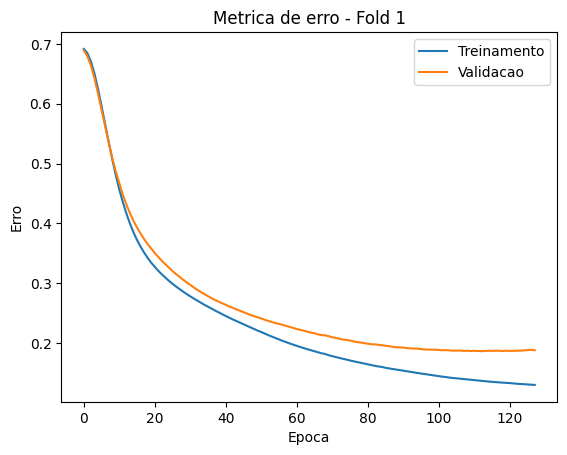

--> Acuracia (treino): 0.9543
--> Acuracia (validacao): 0.9365
--> Ein - Eval = 0.0178
--> val_loss - train_loss = 0.0580

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4282 - loss: 0.6931 - val_accuracy: 0.6270 - val_loss: 0.6896
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6849 - loss: 0.6881 - val_accuracy: 0.8095 - val_loss: 0.6799
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8131 - loss: 0.6763 - val_accuracy: 0.8333 - val_loss: 0.6636
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8429 - loss: 0.6582 - val_accuracy: 0.8492 - val_loss: 0.6415
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8445 - loss: 0.6376 - val_accuracy: 0.8492 - val_loss: 0.6150
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8635 - loss: 0.6067 - val_accuracy: 0.8492 - val_loss: 0.5859
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8519 - loss: 0.5816 - val_accuracy: 0.8571 - val_

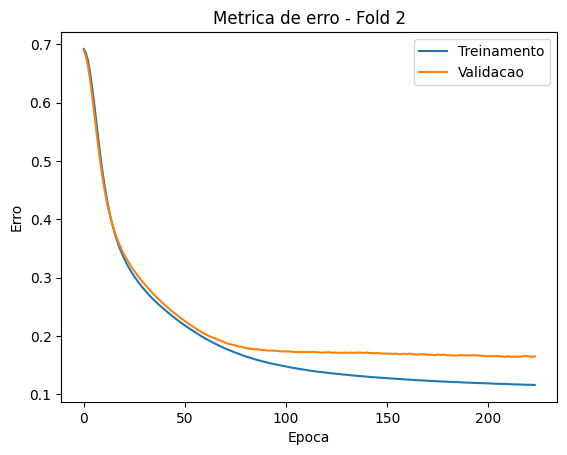

--> Acuracia (treino): 0.9602
--> Acuracia (validacao): 0.9286
--> Ein - Eval = 0.0317
--> val_loss - train_loss = 0.0490

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6698 - loss: 0.6903 - val_accuracy: 0.8254 - val_loss: 0.6863
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8270 - loss: 0.6824 - val_accuracy: 0.8492 - val_loss: 0.6756
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8644 - loss: 0.6709 - val_accuracy: 0.8651 - val_loss: 0.6604
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8730 - loss: 0.6511 - val_accuracy: 0.8651 - val_loss: 0.6415
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8785 - loss: 0.6324 - val_accuracy: 0.8651 - val_loss: 0.6201
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8505 - loss: 0.6098 - val_accuracy: 0.8492 - val_loss: 0.5967
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8573 - loss: 0.5857 - val_accuracy: 0.8571 - val_

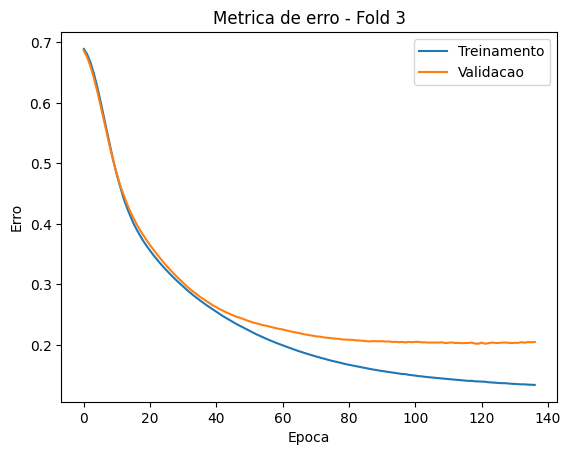

--> Acuracia (treino): 0.9563
--> Acuracia (validacao): 0.9444
--> Ein - Eval = 0.0118
--> val_loss - train_loss = 0.0709

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5008 - loss: 0.6921 - val_accuracy: 0.8254 - val_loss: 0.6845
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8211 - loss: 0.6825 - val_accuracy: 0.8810 - val_loss: 0.6733
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8557 - loss: 0.6694 - val_accuracy: 0.8968 - val_loss: 0.6574
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8509 - loss: 0.6524 - val_accuracy: 0.9048 - val_loss: 0.6376
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8365 - loss: 0.6345 - val_accuracy: 0.9048 - val_loss: 0.6144
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8733 - loss: 0.6081 - val_accuracy: 0.9048 - val_loss: 0.5885
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8708 - loss: 0.5820 - val_accuracy: 0.9048 - val_

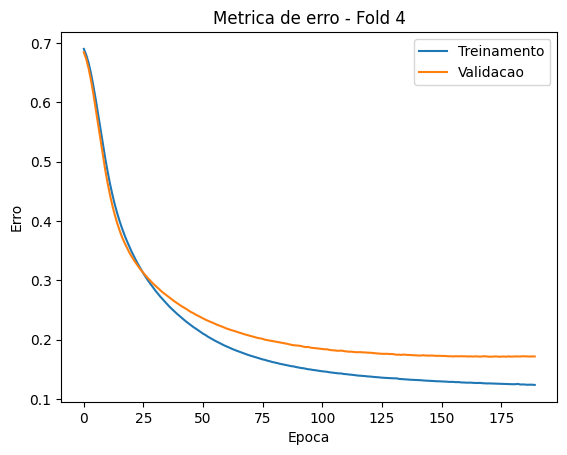

--> Acuracia (treino): 0.9543
--> Acuracia (validacao): 0.9286
--> Ein - Eval = 0.0257
--> val_loss - train_loss = 0.0480

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6754 - loss: 0.6901 - val_accuracy: 0.8800 - val_loss: 0.6817
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8924 - loss: 0.6798 - val_accuracy: 0.8960 - val_loss: 0.6666
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8817 - loss: 0.6653 - val_accuracy: 0.8960 - val_loss: 0.6473
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8874 - loss: 0.6476 - val_accuracy: 0.8960 - val_loss: 0.6246
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8576 - loss: 0.6278 - val_accuracy: 0.8960 - val_loss: 0.5993
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8381 - loss: 0.6079 - val_accuracy: 0.8960 - val_loss: 0.5726
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8476 - loss: 0.5821 - val_accuracy: 0.8960 - val_

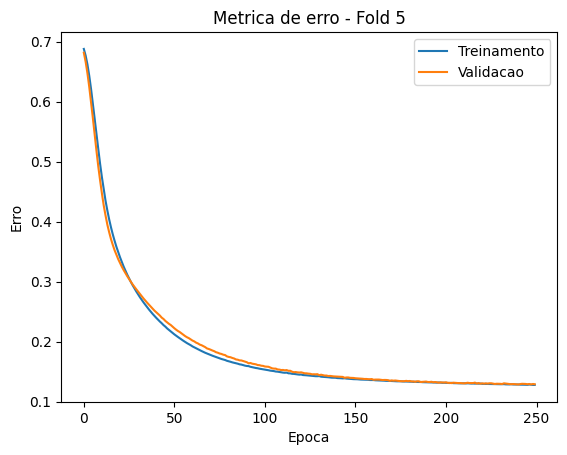

--> Acuracia (treino): 0.9603
--> Acuracia (validacao): 0.9440
--> Ein - Eval = 0.0163
--> val_loss - train_loss = 0.0012



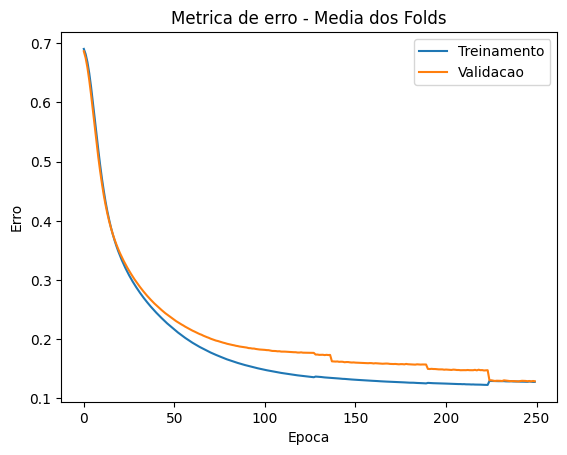

--> Acuracia media (treino): 0.9571
--> Acuracia media (validacao): 0.9364
--> acc_in - acc_val = 0.0207
--> loss medio do treino = 0.1862
--> loss medio da validacao = 0.2072
--> val_loss - train_loss = 0.0210



In [390]:
# Introduzindo o k-fold, com k=5
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
accuracies_train = []
accuracies_val = []
history_list = []
tamanho_history_history_loss_list = []
i = 0
for index_treino, index_val in kfold.split(X_train, Y_train):
    i += 1
    X_train_fold, X_val_fold = X_train[index_treino], X_train[index_val]
    Y_train_fold, Y_val_fold = Y_train[index_treino], Y_train[index_val]

    # Criando a rede neural
    model = Sequential()
    # Adicionando neurônios em uma camada oculta
    model.add(Dense(2, input_dim=29, kernel_initializer='normal', activation='selu')) #quantidade de neuronios na camada escondida, nº de features (selu, relu, gelu)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #camada de saída

    # adicionando a taxa de aprendizado
    learning_rate = 0.001  

    # Criando um otimizador Adam com a taxa de aprendizado desejada
    otimizador = optimizers.Adam(learning_rate=learning_rate)

    # Adicionando uma condição de parada antecipada
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

    # Compilando o modelo
    model.compile(loss = 'binary_crossentropy', optimizer = otimizador, metrics = ['accuracy'])

    #Treinando o modelo
    history = model.fit(X_train_fold, Y_train_fold, validation_data=(X_val_fold, Y_val_fold), epochs=250, batch_size=BATCH_SIZE, verbose=1, callbacks=[es])
    history_list.append(history)
    tamanho_history_history_loss_list.append(len(history.history['loss']))

    # Avalia o modelo
    _, accuracy_train = model.evaluate(X_train_fold, Y_train_fold, batch_size=BATCH_SIZE, verbose=0)
    _, accuracy_val = model.evaluate(X_val_fold, Y_val_fold, batch_size=BATCH_SIZE, verbose=0)
    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)

    # Exibe o historico de treinamento para um fold especifico
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento', 'Validacao'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
    print(f"--> Ein - Eval = {accuracy_train - accuracy_val:.4f}") 
    print(f"--> val_loss - train_loss = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}\n")
       

# Calcula a acuracia media
acuracia_media_treino = np.mean(accuracies_train)
acuracia_media_validacao = np.mean(accuracies_val)

# Historico com valores medios dos folds
history_train_loss_avg_list = []
history_val_losso_avg_list = []

for epoca in range(max(tamanho_history_history_loss_list)):
    list_valores_loss_train = []
    list_valores_loss_val = []
    for j in range(len(history_list)):
        if epoca < len(history_list[j].history['loss']): # verifica se a epoca existe no historico do fold j por causa do early stopping
            list_valores_loss_train.append(history_list[j].history['loss'][epoca])
            list_valores_loss_val.append(history_list[j].history['val_loss'][epoca])
    history_train_loss_avg_list.append(np.mean(list_valores_loss_train)) # Calcula a média dos valores de loss para cada epoca (media da epoca 1, media da epoca 2...)
    history_val_losso_avg_list.append(np.mean(list_valores_loss_val))                           

loss_medio_treino = np.mean(history_train_loss_avg_list)
loss_medio_val = np.mean(history_val_losso_avg_list)

plt.plot(history_train_loss_avg_list)
plt.plot(history_val_losso_avg_list)
plt.title('Metrica de erro - Media dos Folds')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

print(f'--> Acuracia media (treino): {acuracia_media_treino:.4f}')
print(f'--> Acuracia media (validacao): {acuracia_media_validacao:.4f}')
print(f"--> acc_in - acc_val = {acuracia_media_treino - acuracia_media_validacao:.4f}")
print(f"--> loss medio do treino = {loss_medio_treino:.4f}")
print(f"--> loss medio da validacao = {loss_medio_val:.4f}")  
print(f"--> val_loss - train_loss = {(loss_medio_val - loss_medio_treino):.4f}\n")


In [374]:
#Treinando a rede neural
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=250, batch_size=BATCH_SIZE, verbose=1, callbacks=[es])

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6239 - loss: 0.6918 - val_accuracy: 0.8354 - val_loss: 0.6858
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8517 - loss: 0.6832 - val_accuracy: 0.8544 - val_loss: 0.6727
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8775 - loss: 0.6676 - val_accuracy: 0.8671 - val_loss: 0.6490
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8511 - loss: 0.6465 - val_accuracy: 0.8671 - val_loss: 0.6171
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8671 - loss: 0.6114 - val_accuracy: 0.8734 - val_loss: 0.5805
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8785 - loss: 0.5700 - val_accuracy: 0.8734 - val_loss: 0.5427
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8655 - loss: 0.5435 - val_accuracy: 0.8734 - val_loss: 0.5075
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8718 - loss: 0.5001 - val_accuracy: 0.8734 - 

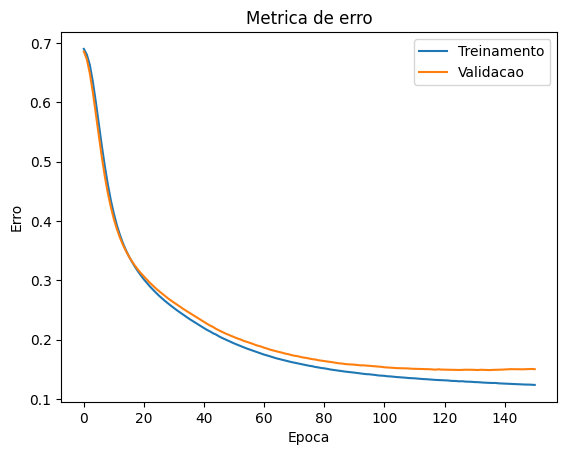

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

--> Acuracia (treino): 0.9571
--> Acuracia (validacao): 0.9367
--> acc_train - acc_val = 0.0204
--> Loss (treino): 0.1238
--> Loss (validacao): 0.1503
--> loss_train - loss_val = -0.0265


{0.0: 325, 1.0: 304}

In [376]:
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

# Obtendo a acuracia usando accuracy_score()
pred = np.round(model.predict(X_train))
acc_train = accuracy_score(Y_train, pred)

pred_val = np.round(model.predict(X_val))
acc_val = accuracy_score(Y_val, pred_val)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> Loss (treino): {history.history['loss'][-1]:.4f}")
print(f"--> Loss (validacao): {history.history['val_loss'][-1]:.4f}")
print(f"--> loss_train - loss_val = {history.history['loss'][-1] - history.history['val_loss'][-1]:.4f}")
pred_np = np.array(pred)
# encontrando os valores unicos de pred_np
unique, counts = np.unique(pred_np, return_counts=True)
dict(zip(unique, counts))


In [352]:
#descobrindo quantos valores unicos existem em pred_val
valores, contagens = np.unique(pred_val, return_counts=True)

# Combina os valores únicos e as contagens correspondentes
resultados = np.column_stack((valores, contagens))

resultados


array([[ 0., 82.],
       [ 1., 76.]])

In [353]:
valores, contagens = np.unique(Y_val, return_counts=True)
resultados = np.column_stack((valores, contagens))
resultados

array([[ 0, 78],
       [ 1, 80]], dtype=int64)

In [354]:
#descobrindo quantos valores unicos existem em pred
valores, contagens = np.unique(pred, return_counts=True)

# Combina os valores únicos e as contagens correspondentes
resultados = np.column_stack((valores, contagens))
resultados

array([[  0., 330.],
       [  1., 299.]])

In [355]:
valores, contagens = np.unique(Y_train, return_counts=True)
resultados = np.column_stack((valores, contagens))
resultados

array([[  0, 312],
       [  1, 317]], dtype=int64)

In [356]:
model.evaluate(X_train, Y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9685 - loss: 0.1115 


[0.12875033915042877, 0.9618442058563232]

In [357]:
model.evaluate(X_val, Y_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9598 - loss: 0.1204 


[0.16029322147369385, 0.9367088675498962]